In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Análise de Dados - Desempenho de Estudantes

Esse projeto tem como objetivo investigar os fatores que mais corroboram para notas de estudantes. Para tanto, tomou-se os dados do diretório público: Student Performance Factors (Insights into Student Performance and Contributing Factors), disponível na plataforma Kaggle. O Método escolhido foi a regressão linear haja vista que almeja-se detalhar se a presença de determida condição explica uma maior/ menor nota (dummies), ou se um incremento em determinado valor tem efeito positivo/ negativo sobre a nota (variáveis númericas).

No que tange aos dados disponíveis, a base de dados contempla tanto variáveis categóricas e ordenadas como variáveis numéricas, vide:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Atributo</th>
      <th>Descrição</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Hours_Studied</td>
      <td>Número de horas dedicadas ao estudo por semana.</td>
    </tr>
    <tr>
      <td>Attendance</td>
      <td>Percentual de aulas frequentadas.</td>
    </tr>
    <tr>
      <td>Parental_Involvement</td>
      <td>Nível de envolvimento dos pais na educação do aluno (Baixo, Médio, Alto).</td>
    </tr>
    <tr>
      <td>Access_to_Resources</td>
      <td>Disponibilidade de recursos educacionais (Baixo, Médio, Alto).</td>
    </tr>
    <tr>
      <td>Extracurricular_Activities</td>
      <td>Participação em atividades extracurriculares (Sim, Não).</td>
    </tr>
    <tr>
      <td>Sleep_Hours</td>
      <td>Número médio de horas de sono por noite.</td>
    </tr>
    <tr>
      <td>Previous_Scores</td>
      <td>Notas de exames anteriores.</td>
    </tr>
    <tr>
      <td>Motivation_Level</td>
      <td>Nível de motivação do aluno (Baixo, Médio, Alto).</td>
    </tr>
    <tr>
      <td>Internet_Access</td>
      <td>Disponibilidade de acesso à internet (Sim, Não).</td>
    </tr>
    <tr>
      <td>Tutoring_Sessions</td>
      <td>Número de sessões de tutoria frequentadas por mês.</td>
    </tr>
    <tr>
      <td>Family_Income</td>
      <td>Nível de renda familiar (Baixo, Médio, Alto).</td>
    </tr>
    <tr>
      <td>Teacher_Quality</td>
      <td>Qualidade dos professores (Baixa, Média, Alta).</td>
    </tr>
    <tr>
      <td>School_Type</td>
      <td>Tipo de escola frequentada (Pública, Privada).</td>
    </tr>
    <tr>
      <td>Peer_Influence</td>
      <td>Influência dos colegas no desempenho acadêmico (Positiva, Neutra, Negativa).</td>
    </tr>
    <tr>
      <td>Physical_Activity</td>
      <td>Número médio de horas de atividade física por semana.</td>
    </tr>
    <tr>
      <td>Learning_Disabilities</td>
      <td>Presença de dificuldades de aprendizado (Sim, Não).</td>
    </tr>
    <tr>
      <td>Parental_Education_Level</td>
      <td>Nível de educação mais alto dos pais (Ensino Médio, Faculdade, Pós-graduação).</td>
    </tr>
    <tr>
      <td>Distance_from_Home</td>
      <td>Distância de casa para a escola (Perto, Moderada, Longe).</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>Sexo do aluno (Masculino, Feminino).</td>
    </tr>
    <tr>
      <td>Exam_Score</td>
      <td>Nota final do exame.</td>
    </tr>
  </tbody>
</table>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
#!kaggle datasets download -d lainguyn123/student-performance-factors && unzip student-performance-factors.zip

In [ ]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0





  <h1>1.Análise Exploratória</h1>

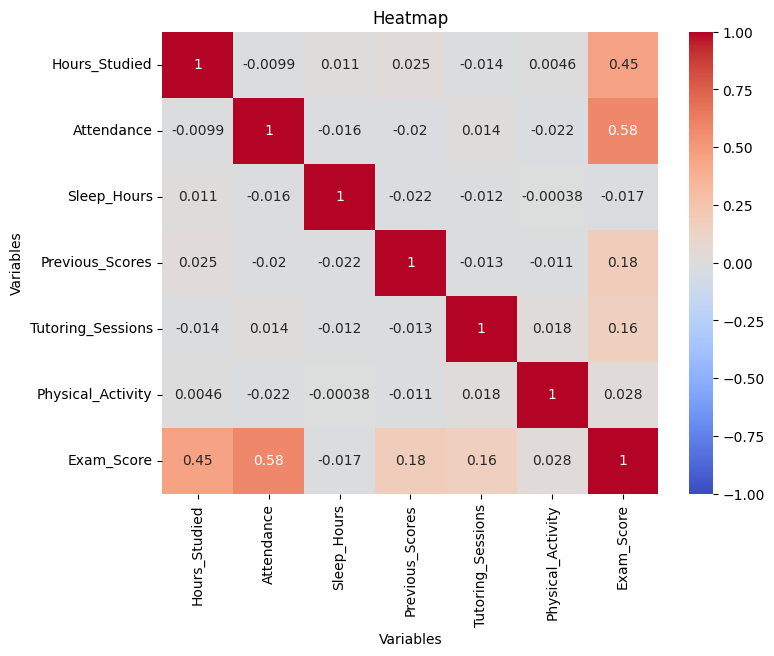

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
# Matriz de Correlação
corr_matrix = numerical_df.corr()
# Heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Gráfico
plt.show()

O heatmap de correlações indica que as variáveis com maior potencial preditivo são: **horas de estudo, presença em aulas, notas anteriores e sessões de tutoria.**






  <h2>Categorias</h2>

  <ul>
    <li>
      <strong>Dados Demográficos:</strong>
      <ul>
        <li>Gênero</li>
      </ul>
    </li>
    <li>
      <strong>Fatores Acadêmicos:</strong>
      <ul>
        <li>Horas de Estudo</li>
        <li>Percentual de Presença</li>
        <li>Notas Anteriores</li>
        <li>Nível de Motivação</li>
        <li>Sessões de Tutoria</li>
        <li>Tipo de Escola</li>
        <li>Influência dos Colegas</li>
        <li>Dificuldades de Aprendizagem</li>
        <li>Qualidade do Professor</li>
      </ul>
    </li>
    <li>
      <strong>Fatores Socioeconômicos e Familiares:</strong>
      <ul>
        <li>Nível de Renda Familiar</li>
        <li>Nível de Educação dos Pais</li>
        <li>Acesso a Recursos</li>
        <li>Envolvimento dos Pais</li>
        <li>Acesso à Internet</li>
        <li>Distância de Casa para a Escola</li>
      </ul>
    </li>
    <li>
      <strong>Estilo de Vida:</strong>
      <ul>
        <li>Horas de Sono</li>
        <li>Atividades Extracurriculares</li>
        <li>Atividade Física</li>
      </ul>
    </li>
    

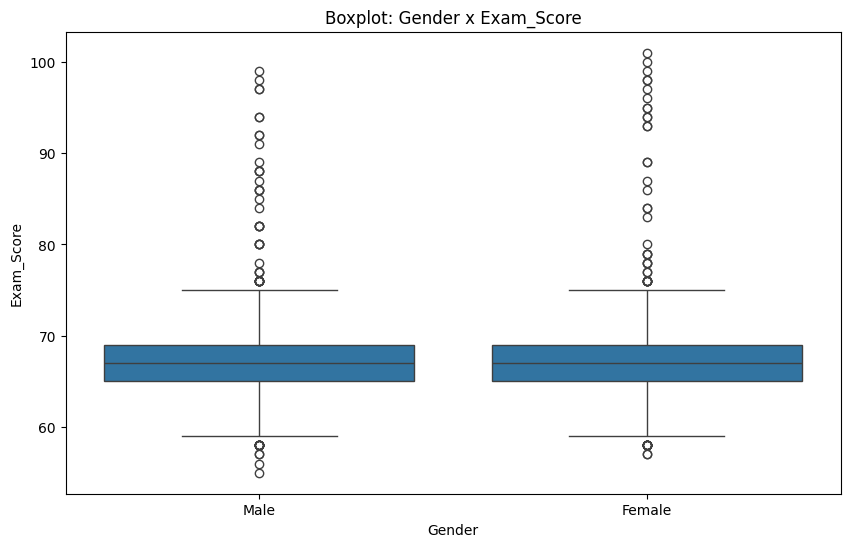


         0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9
Gender                                                      
Female  63.0  64.0  65.0  66.0  67.0  68.0  69.0  70.0  72.0
Male    63.0  64.0  65.0  66.0  67.0  68.0  69.0  70.0  72.0



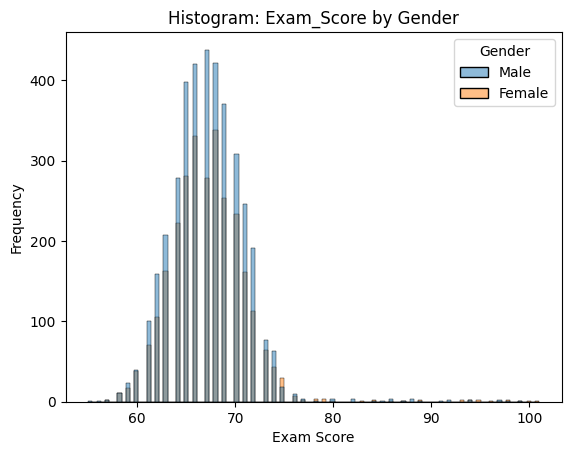

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Exam_Score', data=df)
plt.title('Boxplot: Gender x Exam_Score')
plt.show()

print()

#Quantiles
quantiles_by_gender = df.groupby('Gender')['Exam_Score'].quantile([0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).unstack()
print(quantiles_by_gender)

print()

#Histogram
sns.histplot(x='Exam_Score', data=df, hue='Gender')
plt.title('Histogram: Exam_Score by Gender')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


  <h1>Fatores Demográficos</h1>





A tabela mostra que não há diferença significativa nas notas entre homens e mulheres em nenhum dos quantis. Ambos os gêneros apresentam uma progressão semelhante nos quantis, com as notas aumentando gradualmente do quantil 0,1 ao 0,9. Essa similaridade sugere que o gênero não tem um impacto significativo no desempenho nas provas, pelo menos não de acordo com os dados fornecidos.







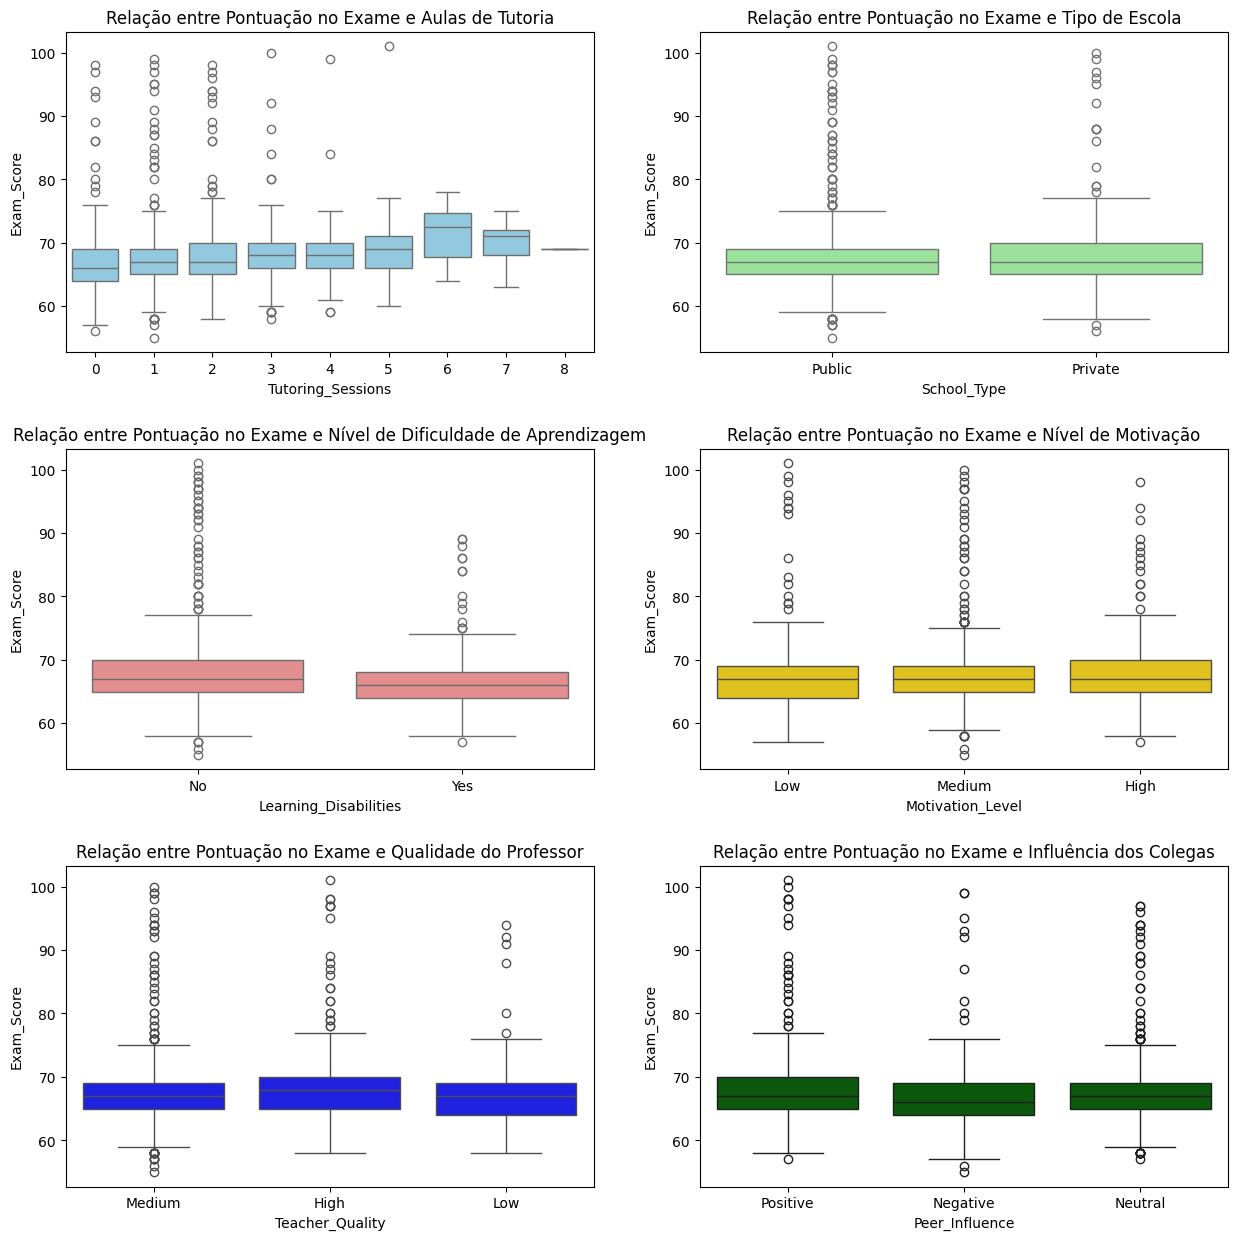

In [ ]:
figura, axes = plt.subplots(3, 2, figsize=(15, 15))

# Access individual axes using indexing
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]


sns.boxplot(data=df, x='Tutoring_Sessions', y='Exam_Score', ax=ax1, color='skyblue')
sns.boxplot(data=df, x='School_Type', y='Exam_Score', ax=ax2, color='lightgreen')
sns.boxplot(data=df, x='Learning_Disabilities', y='Exam_Score', ax=ax3, color='lightcoral')
sns.boxplot(data=df, x='Motivation_Level', y='Exam_Score', ax=ax4, color='gold')
sns.boxplot(data=df, x='Teacher_Quality', y='Exam_Score', ax=ax5, color='blue')
sns.boxplot(data=df, x='Peer_Influence', y='Exam_Score', ax=ax6, color='darkgreen')



ax1.set_title('Relação entre Pontuação no Exame e Aulas de Tutoria')
ax2.set_title('Relação entre Pontuação no Exame e Tipo de Escola')
ax3.set_title('Relação entre Pontuação no Exame e Nível de Dificuldade de Aprendizagem')
ax4.set_title('Relação entre Pontuação no Exame e Nível de Motivação')
ax5.set_title('Relação entre Pontuação no Exame e Qualidade do Professor')
ax6.set_title('Relação entre Pontuação no Exame e Influência dos Colegas')


figura.subplots_adjust(hspace=0.3)  # Espaçamento vertical ajustado

plt.show()



In [ ]:
quantiles_by_Tutoring_Sessions = df.groupby('Tutoring_Sessions')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Tutoring_Sessions)

print()

quantiles_by_School_Type = df.groupby('School_Type')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_School_Type)

print()

quantiles_by_Learning_Disabilities = df.groupby('Learning_Disabilities')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Learning_Disabilities)

print()

quantiles_by_Motivation_Level = df.groupby('Motivation_Level')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Motivation_Level)

print()

quantiles_by_Teacher_Quality = df.groupby('Teacher_Quality')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Teacher_Quality)

print()

quantiles_by_Peer_Influence = df.groupby('Peer_Influence')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Peer_Influence)

                    0.25  0.50   0.75
Tutoring_Sessions                    
0                  64.00  66.0  69.00
1                  65.00  67.0  69.00
2                  65.00  67.0  70.00
3                  66.00  68.0  70.00
4                  66.00  68.0  70.00
5                  66.00  69.0  71.00
6                  67.75  72.5  74.75
7                  68.00  71.0  72.00
8                  69.00  69.0  69.00

             0.25  0.50  0.75
School_Type                  
Private      65.0  67.0  70.0
Public       65.0  67.0  69.0

                       0.25  0.50  0.75
Learning_Disabilities                  
No                     65.0  67.0  70.0
Yes                    64.0  66.0  68.0

                  0.25  0.50  0.75
Motivation_Level                  
High              65.0  67.0  70.0
Low               64.0  67.0  69.0
Medium            65.0  67.0  69.0

                 0.25  0.50  0.75
Teacher_Quality                  
High             65.0  68.0  70.0
Low              64.0

<html>

<body>

  <h1>Fatores acadêmicos que influenciam as notas</h1>

  <h2>Sessões de Tutoria</h2>
  <ul>
    <li>O aumento do número de sessões de tutoria está geralmente associado a notas mais altas, especialmente no quantil 0,75 (percentil 75).</li>
    <li>No entanto, essa relação não é estritamente linear. O maior aumento nas notas parece ocorrer entre 0 e 6 sessões, com um aumento menos pronunciado após esse ponto.</li>
  </ul>

  <h2>Tipo de Escola</h2>
  <ul>
    <li>Alunos de escolas particulares tendem a ter notas ligeiramente mais altas no quantil 0,75 em comparação com alunos de escolas públicas.</li>
    <li>As notas nos quantis 0,25 e 0,50 são semelhantes entre os tipos de escola.</li>
  </ul>

  <h2>Dificuldades de Aprendizagem</h2>
  <ul>
    <li>Alunos sem dificuldades de aprendizado apresentam notas mais altas em todos os quantis em comparação com alunos com dificuldades de aprendizado.</li>
    <li>Essa diferença é consistente em todos os três quantis.</li>
  </ul>

  <h2>Nível de Motivação</h2>
  <ul>
    <li>Alunos com alto nível de motivação tendem a ter notas mais altas no quantil 0,75 em comparação com alunos com baixo ou médio nível de motivação.</li>
    <li>As notas nos quantis 0,25 e 0,50 são semelhantes entre os diferentes níveis de motivação.</li>
  </ul>

  <h2>Qualidade do Professor</h2>
  <ul>
    <li>Alunos que avaliaram a qualidade do professor como alta tendem a ter notas mais altas no quantil 0,50 e 0,75 em comparação com alunos que avaliaram a qualidade do professor como baixa ou média.</li>
    <li>As notas no quantil 0,25 são semelhantes entre os diferentes níveis de qualidade do professor.</li>
  </ul>

  <h2>Influência dos Colegas</h2>
  <ul>
    <li>Alunos que relatam influência positiva dos colegas tendem a ter notas mais altas no quantil 0,75 em comparação com alunos que relatam influência negativa ou neutra.</li>
    <li>As notas nos quantis 0,25 e 0,50 são semelhantes entre os diferentes tipos de influência dos colegas.</li>
  </ul>

</body>
</html>

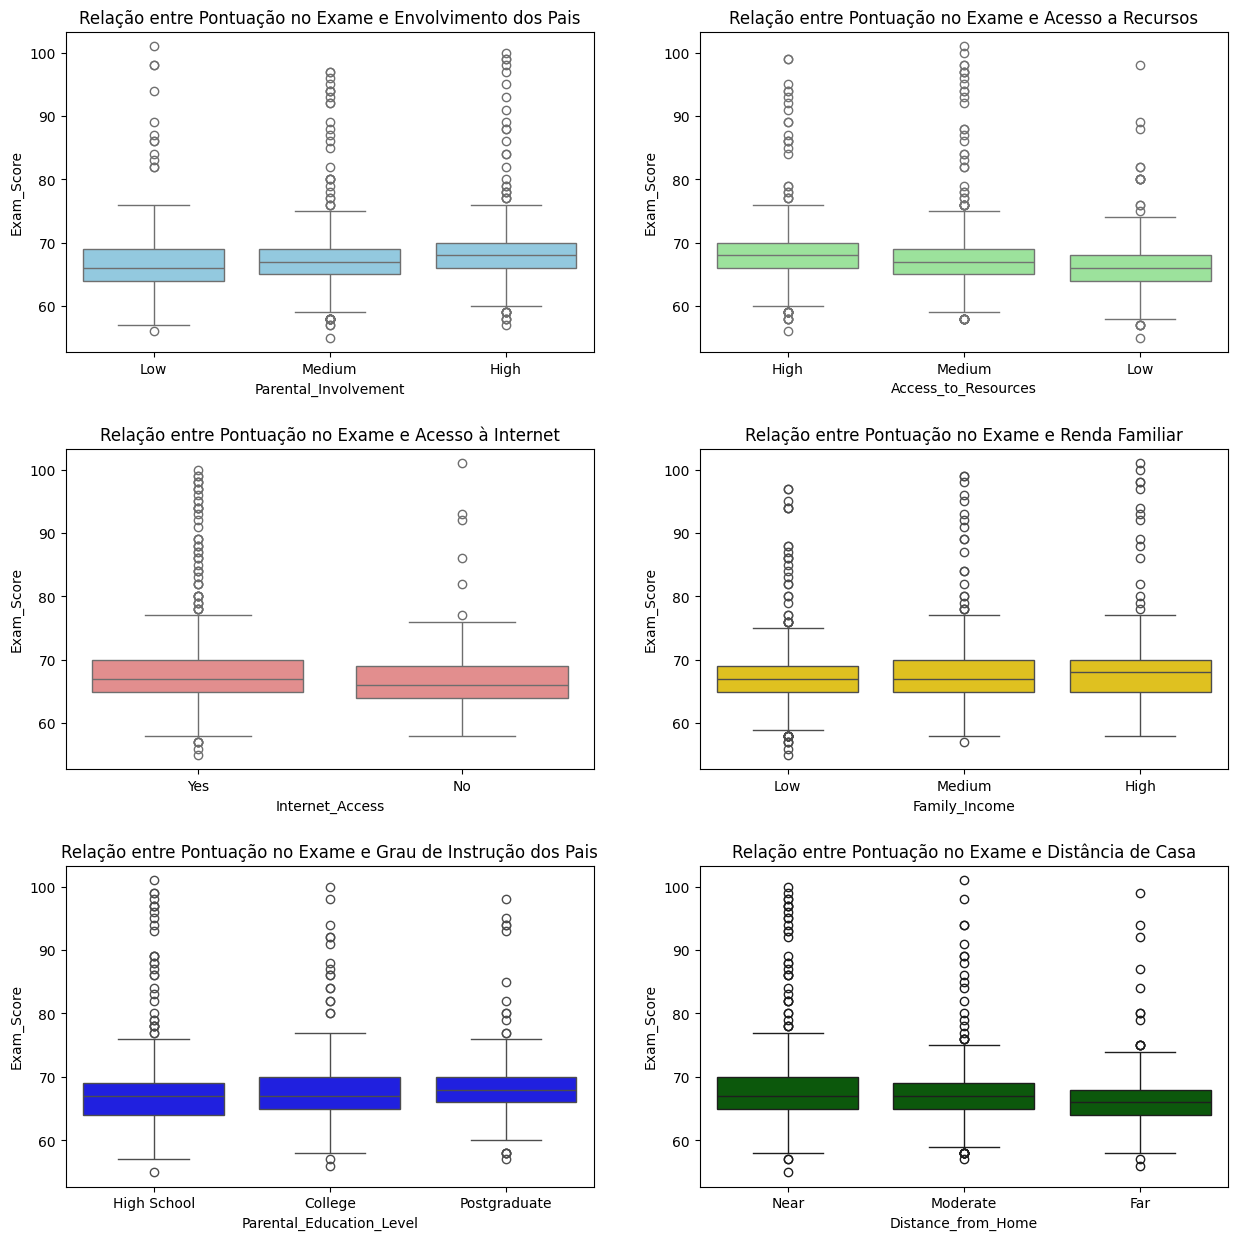

In [ ]:
figura, axes = plt.subplots(3, 2, figsize=(15, 15))

# Access individual axes using indexing
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]


sns.boxplot(data=df, x='Parental_Involvement', y='Exam_Score', ax=ax1, color='skyblue')
sns.boxplot(data=df, x='Access_to_Resources', y='Exam_Score', ax=ax2, color='lightgreen')
sns.boxplot(data=df, x='Internet_Access', y='Exam_Score', ax=ax3, color='lightcoral')
sns.boxplot(data=df, x='Family_Income', y='Exam_Score', ax=ax4, color='gold')
sns.boxplot(data=df, x='Parental_Education_Level', y='Exam_Score', ax=ax5, color='blue')
sns.boxplot(data=df, x='Distance_from_Home', y='Exam_Score', ax=ax6, color='darkgreen')



ax1.set_title('Relação entre Pontuação no Exame e Envolvimento dos Pais')
ax2.set_title('Relação entre Pontuação no Exame e Acesso a Recursos')
ax3.set_title('Relação entre Pontuação no Exame e Acesso à Internet')
ax4.set_title('Relação entre Pontuação no Exame e Renda Familiar')
ax5.set_title('Relação entre Pontuação no Exame e Grau de Instrução dos Pais')
ax6.set_title('Relação entre Pontuação no Exame e Distância de Casa')


figura.subplots_adjust(hspace=0.3)  # Espaçamento vertical ajustado

plt.show()



In [ ]:
quantiles_by_Parental_Involvement = df.groupby('Parental_Involvement')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Parental_Involvement)

print()

quantiles_by_Access_to_Resources = df.groupby('Access_to_Resources')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Access_to_Resources)

print()

quantiles_by_Internet_Access = df.groupby('Internet_Access')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Internet_Access)

print()

quantiles_by_Family_Income = df.groupby('Family_Income')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Family_Income)

print()

quantiles_by_Parental_Education_Level = df.groupby('Parental_Education_Level')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Parental_Education_Level)

print()

quantiles_by_Distance_from_Home = df.groupby('Distance_from_Home')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Distance_from_Home)

                      0.25  0.50  0.75
Parental_Involvement                  
High                  66.0  68.0  70.0
Low                   64.0  66.0  69.0
Medium                65.0  67.0  69.0

                     0.25  0.50  0.75
Access_to_Resources                  
High                 66.0  68.0  70.0
Low                  64.0  66.0  68.0
Medium               65.0  67.0  69.0

                 0.25  0.50  0.75
Internet_Access                  
No               64.0  66.0  69.0
Yes              65.0  67.0  70.0

               0.25  0.50  0.75
Family_Income                  
High           65.0  68.0  70.0
Low            65.0  67.0  69.0
Medium         65.0  67.0  70.0

                          0.25  0.50  0.75
Parental_Education_Level                  
College                   65.0  67.0  70.0
High School               64.0  67.0  69.0
Postgraduate              66.0  68.0  70.0

                    0.25  0.50  0.75
Distance_from_Home                  
Far                 64.0 

<html>

<body>

  <h1>Fatores Socioeconômicos e Familiares que influenciam as notas</h1>

  <h2>Envolvimento Parental</h2>
  <ul>
    <li>Maior envolvimento dos pais está associado a notas mais altas em todos os quantis, especialmente no quantil 0,75.</li>
    <li>Alunos com baixo envolvimento parental tendem a ter as notas mais baixas, enquanto aqueles com alto envolvimento parental tendem a ter as notas mais altas.</li>
  </ul>

  <h2>Acesso a Recursos</h2>
  <ul>
    <li>O acesso a recursos mostra um padrão semelhante ao envolvimento parental.</li>
    <li>Alunos com alto acesso a recursos têm notas mais altas em todos os quantis, especialmente no quantil 0,75.</li>
    <li>Alunos com baixo acesso a recursos têm as notas mais baixas.</li>
  </ul>

  <h2>Acesso à Internet</h2>
  <ul>
    <li>Alunos com acesso à internet tendem a ter notas mais altas em todos os quantis, especialmente no quantil 0,75, em comparação com aqueles sem acesso.</li>
  </ul>

  <h2>Renda Familiar</h2>
  <ul>
    <li>Renda familiar alta está associada a notas mais altas no quantil 0,50 e 0,75.</li>
    <li>No entanto, a diferença entre os níveis de renda é menos pronunciada no quantil 0,25.</li>
  </ul>

  <h2>Nível de Educação Parental</h2>
  <ul>
    <li>O nível de educação parental "Pós-graduação" está associado a notas mais altas no quantil 0,25 e 0,75.</li>
    <li>Alunos cujos pais possuem apenas o ensino médio tendem a ter as notas mais baixas no quantil 0,25.</li>
  </ul>

  <h2>Distância de Casa</h2>
  <ul>
    <li>Morar perto da escola está associado a notas mais altas no quantil 0,75.</li>
    <li>Alunos que moram longe da escola tendem a ter as notas mais baixas em todos os quantis.</li>
  </ul>

</body>
</html>

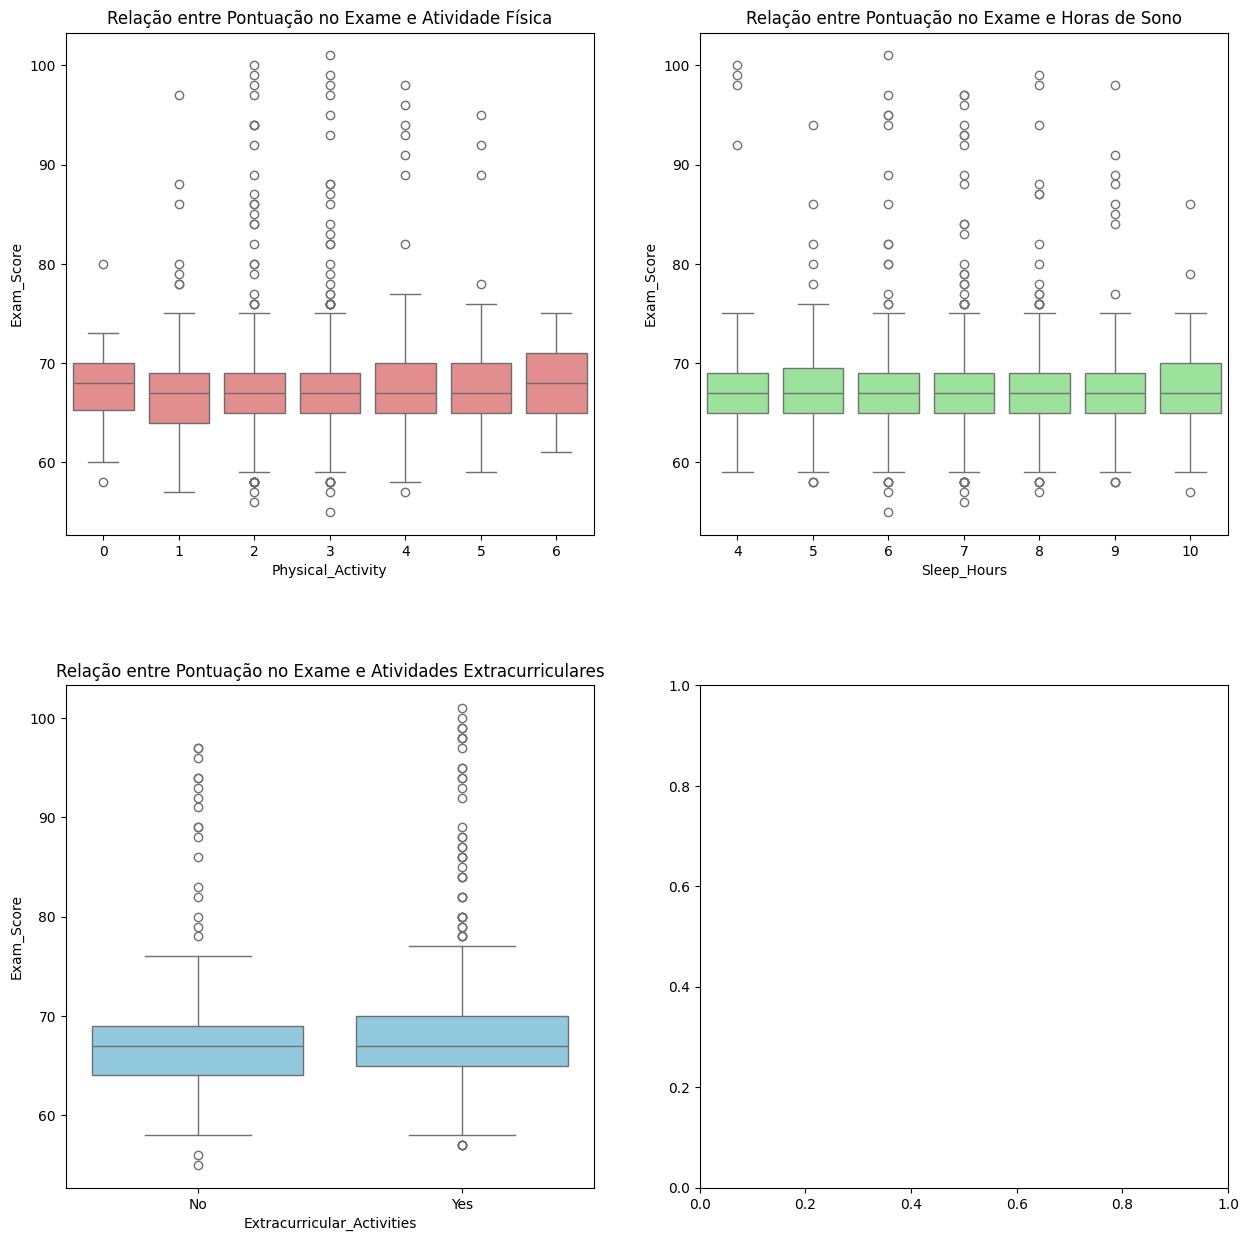

In [ ]:
figura, axes = plt.subplots(2, 2, figsize=(15, 15))

# Access individual axes using indexing
ax1 = axes[1, 0]
ax2 = axes[0, 1]
ax3 = axes[0, 0]



sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score', ax=ax1, color='skyblue')
sns.boxplot(data=df, x='Sleep_Hours', y='Exam_Score', ax=ax2, color='lightgreen')
sns.boxplot(data=df, x='Physical_Activity', y='Exam_Score', ax=ax3, color='lightcoral')



ax1.set_title('Relação entre Pontuação no Exame e Atividades Extracurriculares')
ax2.set_title('Relação entre Pontuação no Exame e Horas de Sono')
ax3.set_title('Relação entre Pontuação no Exame e Atividade Física')



figura.subplots_adjust(hspace=0.3)  # Espaçamento vertical ajustado

plt.show()



In [ ]:
quantiles_by_Extracurricular_Activities = df.groupby('Extracurricular_Activities')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Extracurricular_Activities)

print()

quantiles_by_Sleep_Hours = df.groupby('Sleep_Hours')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Sleep_Hours)

print()

quantiles_by_Physical_Activity = df.groupby('Physical_Activity')['Exam_Score'].quantile([0.25, 0.5,0.75]).unstack()
print(quantiles_by_Physical_Activity)

print()

                            0.25  0.50  0.75
Extracurricular_Activities                  
No                          64.0  67.0  69.0
Yes                         65.0  67.0  70.0

             0.25  0.50  0.75
Sleep_Hours                  
4            65.0  67.0  69.0
5            65.0  67.0  69.5
6            65.0  67.0  69.0
7            65.0  67.0  69.0
8            65.0  67.0  69.0
9            65.0  67.0  69.0
10           65.0  67.0  70.0

                    0.25  0.50  0.75
Physical_Activity                   
0                  65.25  68.0  70.0
1                  64.00  67.0  69.0
2                  65.00  67.0  69.0
3                  65.00  67.0  69.0
4                  65.00  67.0  70.0
5                  65.00  67.0  70.0
6                  65.00  68.0  71.0



<html>

<body>

  <h1>Fatores de Estilo de Vida que influenciam as notas</h1>

  <h2>Atividades Extracurriculares</h2>
  <ul>
    <li>Participar de atividades extracurriculares tem um impacto positivo, ainda que pequeno, nas notas.</li>
    <li>Alunos que participam de atividades extracurriculares tendem a ter notas ligeiramente maiores no quantil 0,75 em comparação com aqueles que não participam.</li>
    <li>Essa diferença sugere que atividades extracurriculares podem contribuir para o desenvolvimento de habilidades e conhecimentos que auxiliam no desempenho acadêmico.</li>
  </ul>

  <h2>Horas de Sono</h2>
  <ul>
    <li>A relação entre horas de sono e notas não é linear.</li>
    <li>Dormir 10 horas está associado a notas ligeiramente maiores no quantil 0,75.</li>
    <li>No entanto, não há muita diferença nas notas entre aqueles que dormem entre 4 e 9 horas.</li>
    <li>É importante notar que essa análise não considera a qualidade do sono, que também pode influenciar o desempenho acadêmico.</li>
  </ul>

  <h2>Atividade Física</h2>
  <ul>
    <li>A atividade física parece ter um impacto positivo nas notas, especialmente para aqueles que praticam com maior frequência.</li>
    <li>Alunos que praticam 6 horas de atividade física por semana tendem a ter as maiores notas no quantil 0,75.</li>
    <li>No entanto,  o aumento nas notas não é linear, com o maior salto ocorrendo entre 0 e 6 horas de atividade física semanal.</li>
  </ul>

</body>
</html>

<h1> 2. Dados </h1>



### **2.1. Valores nulos**

In [ ]:
# eliminar linhas com NA nas colunas categóricas e variável resposta
categorical_columns = df.select_dtypes(include=['object']).columns
df = df.dropna(subset=categorical_columns)

# calcular média nas colunas numéricas com NA
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].apply(lambda col: col.fillna(col.mean()))

### **2.2. Variáveis numéricas**

In [ ]:
# Caso queira padronizar as variáveis numéricas:
#Não usarei, pois quero avaliar o impacto de 1 unidade a mais nas notas



#for col in df.columns:
   # if df[col].dtype in ['int64', 'float64']:
   #     if col != "Exam_Score":
   #         std_col_name = f"{col}_std"
  #          df[std_col_name] = (df[col] - df[col].mean()) / df[col].std()

#std_columns = [col for col in df.columns if '_std' in col]
#df = df.drop(columns=[col for col in df.columns if '_std' not in col and df[col].dtype in ['int64', 'float64'] and col != "Exam_Score"])

#print(df)

### **2.3. Variáveis categóricas**

In [ ]:
categorical_df = df.select_dtypes(include=['object'])

for col in categorical_df.columns:
  print(f"Unique values for {col}: {categorical_df[col].unique()}")

Unique values for Parental_Involvement: ['Low' 'Medium' 'High']
Unique values for Access_to_Resources: ['High' 'Medium' 'Low']
Unique values for Extracurricular_Activities: ['No' 'Yes']
Unique values for Motivation_Level: ['Low' 'Medium' 'High']
Unique values for Internet_Access: ['Yes' 'No']
Unique values for Family_Income: ['Low' 'Medium' 'High']
Unique values for Teacher_Quality: ['Medium' 'High' 'Low']
Unique values for School_Type: ['Public' 'Private']
Unique values for Peer_Influence: ['Positive' 'Negative' 'Neutral']
Unique values for Learning_Disabilities: ['No' 'Yes']
Unique values for Parental_Education_Level: ['High School' 'College' 'Postgraduate']
Unique values for Distance_from_Home: ['Near' 'Moderate' 'Far']
Unique values for Gender: ['Male' 'Female']


In [ ]:
#Ordinais
map_ordinal={
'Low':0,
'Medium':1,
'High':2}

df['Parental_Involvement_num'] = df['Parental_Involvement'].apply(lambda x: map_ordinal.get(x))
df['Access_to_Resources_num'] = df['Access_to_Resources'].apply(lambda x: map_ordinal.get(x))
df['Motivation_Level_num'] = df['Motivation_Level'].apply(lambda x: map_ordinal.get(x))
df['Family_Income_num'] = df['Family_Income'].apply(lambda x: map_ordinal.get(x))
df['Teacher_Quality_num'] = df['Teacher_Quality'].apply(lambda x: map_ordinal.get(x))


df.drop(['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality'], axis=1, inplace=True)

print(df)

      Hours_Studied  Attendance Extracurricular_Activities  Sleep_Hours  \
0                23          84                         No            7   
1                19          64                         No            8   
2                24          98                        Yes            7   
3                29          89                        Yes            8   
4                19          92                        Yes            6   
...             ...         ...                        ...          ...   
6602             25          69                         No            7   
6603             23          76                         No            8   
6604             20          90                        Yes            6   
6605             10          86                        Yes            6   
6606             15          67                        Yes            9   

      Previous_Scores Internet_Access  Tutoring_Sessions School_Type  \
0                  73      

In [ ]:
# One-hot encoding para as outras variáveis categóricas
colunas_encode = ['Extracurricular_Activities', 'Internet_Access', 'School_Type',
          'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
               'Distance_from_Home', 'Gender']

df = pd.get_dummies(df, columns=colunas_encode, dtype=int)


# Exlcuir uma dummy já que usaremos um regressão linear com intercepto
for column in colunas_encode:
    dummy_cols = [col for col in df.columns if col.startswith(column + "_")]
    if dummy_cols:
        df = df.drop(columns=[dummy_cols[0]])

print(df)

      Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0                23          84            7               73   
1                19          64            8               59   
2                24          98            7               91   
3                29          89            8               98   
4                19          92            6               65   
...             ...         ...          ...              ...   
6602             25          69            7               76   
6603             23          76            8               81   
6604             20          90            6               65   
6605             10          86            6               91   
6606             15          67            9               94   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
0                     0                  3          67   
1                     2                  4          61   
2                     2                  4   

### **2.5. Treino/Teste**

Separando a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [ ]:
# resposta da questão 2.5

from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(
    df.drop(['Exam_Score'], axis=1),
    df['Exam_Score'],
    test_size=1/3,
    random_state=123
)

In [ ]:
predictors_train.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_num,Access_to_Resources_num,Motivation_Level_num,Family_Income_num,...,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
6227,22,75,6,54,4,4,1,2,0,0,...,1,1,0,1,0,1,0,0,1,1
1729,31,90,7,61,0,3,2,2,0,0,...,1,1,0,1,0,1,0,0,1,1
1123,13,88,9,61,4,3,2,0,0,1,...,1,0,0,0,0,1,0,0,1,0
2200,31,91,6,82,2,3,1,1,1,1,...,1,1,0,1,0,1,0,0,1,1
205,14,82,8,65,1,3,1,1,1,0,...,1,0,0,1,0,0,0,0,1,1


In [ ]:
predictors_train.shape

(4252, 22)

In [ ]:
target_train.head()

,Exam_Score
6227,68
1729,72
1123,66
2200,74
205,65


In [ ]:
target_test.head()

,Exam_Score
3293,65
2322,71
6276,64
490,66
1459,68



<h1> 3. Modelagem </h1>

### **3.1. Treino**

In [ ]:
# resposta da questão 3.1


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#model = LinearRegression()

#model = model.fit(predictors_train, target_train)

predictors_train = sm.add_constant(predictors_train)

sm_model = sm.OLS(target_train, predictors_train).fit()

p_values = sm_model.pvalues

#Parâmetros
print(sm_model.params)
print()
#p-valores
print(p_values)




const                                    34.374491
Hours_Studied                             0.291542
Attendance                                0.198376
Sleep_Hours                               0.000491
Previous_Scores                           0.049389
Tutoring_Sessions                         0.491943
Physical_Activity                         0.185544
Parental_Involvement_num                  0.967175
Access_to_Resources_num                   1.021033
Motivation_Level_num                      0.583417
Family_Income_num                         0.543847
Teacher_Quality_num                       0.556857
Extracurricular_Activities_Yes            0.589570
Internet_Access_Yes                       0.966224
School_Type_Public                        0.020294
Peer_Influence_Neutral                    0.485958
Peer_Influence_Positive                   1.062080
Learning_Disabilities_Yes                -0.789120
Parental_Education_Level_High School     -0.472761
Parental_Education_Level_Postgr


<html>
  <h1>Fatores que Influenciam as Notas dos Exames</h1>

  <h2>Fatores Acadêmicos</h2>
  <p>Esta categoria tem um alto impacto nas notas dos exames, com 90% das variáveis sendo estatisticamente significativas.</p>
  <ul>
    <li>Variáveis como <b>Horas_Studied</b>, <b>Attendance</b>, <b>Previous_Scores</b>, <b>Motivation_Level_num</b>, <b>Tutoring_Sessions</b>, <b>Peer_Influence</b>, <b>Learning_Disabilities_Yes</b> e <b>Teacher_Quality_num</b> mostraram-se significativas.</li>
    <li><b>School_Type_Public</b> não foi significativo, sugerindo que o tipo de escola (pública ou privada) pode não ter um efeito direto nas notas.</li>
  </ul>

  <h2>Fatores Socioeconômicos e Familiares</h2>
  <p>Todas as variáveis nesta categoria são altamente significativas.</p>
  <ul>
    <li><b>Family_Income_num</b>, <b>Parental_Education_Level</b>, <b>Access_to_Resources_num</b>, <b>Parental_Involvement_num</b>, <b>Internet_Access_Yes</b> e <b>Distance_from_Home</b> demonstraram influenciar as notas dos exames.</li>
    <li>Isso sugere que o contexto socioeconômico e familiar do aluno desempenha um papel crucial no desempenho acadêmico.</li>
  </ul>

  <h2>Estilo de Vida</h2>
  <ul>
    <li><b>Extracurricular_Activities_Yes</b> e <b>Physical_Activity</b> são significativas, indicando que a participação em atividades extracurriculares e a prática de atividades físicas podem ter um efeito positivo nas notas.</li>
    <li><b>Sleep_Hours</b> não foi significativo neste estudo.</li>
  </ul>

  <h2>Dados Demográficos</h2>
  <ul>
    <li><b>Gender_Male</b> não foi significativo, sugerindo que o gênero pode não ter um impacto direto nas notas dos exames.</li>
  </ul>
</html>


<html>
  <h1>Resultados da Regressão: Impacto das Variáveis nas Notas dos Exames</h1>

  <h2>Variáveis Numéricas</h2>
  <ul>
    <li><b>Hours_Studied:</b> Um aumento de 1 hora de estudo está associado a um aumento de 0.291542 pontos na nota do exame.</li>
    <li><b>Attendance:</b> Um aumento de 1 ponto percentual na frequência está associado a um aumento de 0.198376 pontos na nota do exame.</li>
    <li><b>Previous_Scores:</b> Um aumento de 1 ponto nas notas anteriores está associado a um aumento de 0.049389 pontos na nota do exame.</li>
    <li><b>Access_to_Resources_num:</b> Um aumento de 1 unidade na escala de acesso a recursos está associado a um aumento de 1.02103 pontos na nota do exame.</li>
    <li><b>Parental_Involvement_num:</b> Um aumento de 1 unidade na escala de envolvimento dos pais está associado a um aumento de 0.967175 pontos na nota do exame.</li>
    <li><b>Motivation_Level_num:</b> Um aumento de 1 unidade na escala de nível de motivação está associado a um aumento de 0.583417 pontos na nota do exame.</li>
    <li><b>Teacher_Quality_num:</b> Um aumento de 1 unidade na escala de qualidade do professor está associado a um aumento de 0.556857 pontos na nota do exame.</li>
    <li><b>Family_Income_num:</b> Um aumento de 1 unidade na escala de renda familiar está associado a um aumento de 0.543847 pontos na nota do exame.</li>
  </ul>

  <h2>Variáveis Categóricas</h2>
  <ul>
    <li><b>Extracurricular_Activities_Yes:</b> Participar de atividades extracurriculares está associado a um aumento de 0.58957 pontos na nota do exame, em comparação a não participar.</li>
    <li><b>Internet_Access_Yes:</b> Ter acesso à internet está associado a um aumento de 0.966224 pontos na nota do exame, em comparação a não ter acesso.</li>
    <li><b>Peer_Influence_Neutral:</b> Ter influência neutra dos colegas está associado a um aumento de 0.485958 pontos na nota do exame, em comparação a ter influência negativa (que é a categoria omitida).</li>
    <li><b>Peer_Influence_Positive:</b> Ter influência positiva dos colegas está associado a um aumento de 1.06208 pontos na nota do exame, em comparação a ter influência negativa (que é a categoria omitida).</li>
    <li><b>Learning_Disabilities_Yes:</b> Ter dificuldades de aprendizado está associado a uma diminuição de 0.78912 pontos na nota do exame, em comparação a não ter dificuldades.</li>
    <li><b>Parental_Education_Level:</b></li>
    <ul>
      <li>Ter pais com nível de educação "High School" está associado a uma diminuição de 0.472761 pontos na nota do exame, em comparação a ter pais com nível de educação "College" (que é a categoria omitida).</li>
      <li>Ter pais com nível de educação "Postgraduate" está associado a um aumento de 0.527055 pontos na nota do exame, em comparação a ter pais com nível de educação "College" (que é a categoria omitida).</li>
    </ul>
    <li><b>Distance_from_Home:</b></li>
    <ul>
      <li>Morar a uma distância "Moderate" da escola está associado a um aumento de 0.476787 pontos na nota do exame, em comparação a morar "Far" (que é a categoria omitida).</li>
      <li>Morar "Near" da escola está associado a um aumento de 1.05327 pontos na nota do exame, em comparação a morar "Far" (que é a categoria omitida).</li>
    </ul>
  </ul>
</html>

### **3.2. Avaliação**

In [ ]:
predictors_test = sm.add_constant(predictors_test)
target_predicted = sm_model.predict(predictors_test)



In [ ]:

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

1.6554851886259283


O RMSE é uma medida da precisão do modelo de regressão. Ele indica o desvio médio entre os valores previstos pelo modelo e os valores reais. Quanto menor o RMSE, melhor o modelo se ajusta aos dados. Um RMSE de 1.655 sugere que, em média, as previsões do modelo estão desviando 1.655 unidades do valor real da variável alvo.